In [72]:
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
from datetime import date, time, datetime
from operator import attrgetter
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('ecom_data.xlsx', sheet_name=['Orders','Customers','Sales_people','Returns'])

C:\Users\Bogdan\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
C:\Users\Bogdan\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
C:\Users\Bogdan\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [3]:
orders = data['Orders']
customers = data['Customers']
sales_people = data['Sales_people']
returns = data['Returns']

In [4]:
returns.head()

,Returned,Order ID
0,Yes,CA-2017-100762
1,Yes,CA-2017-100762
2,Yes,CA-2017-100762
3,Yes,CA-2017-100762
4,Yes,CA-2017-100867


In [5]:
# merge orders with customers on left
orders_customers = pd.merge(orders, customers, on='Customer ID', how='left')
orders_customers.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State,Postal Code,Region,...,Discount,Profit,Segment,Country,CityOfLiving,Phone,Email_falg,App,App_push,website_registration_date
0,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,United States,Henderson,Kentucky,42420.0,South,...,0.00,41.9136,Consumer,United States,Henderson,1,1,1,0,2018-10-20
1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,United States,Henderson,Kentucky,42420.0,South,...,0.00,219.5820,Consumer,United States,Henderson,1,1,1,0,2018-10-20
2,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,United States,Los Angeles,California,90036.0,West,...,0.00,6.8714,Corporate,United States,Los Angeles,1,1,1,1,2019-06-16
3,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,United States,Fort Lauderdale,Florida,33311.0,South,...,0.45,-383.0310,Consumer,United States,Fort Lauderdale,1,1,0,0,2018-09-30
4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,United States,Fort Lauderdale,Florida,33311.0,South,...,0.20,2.5164,Consumer,United States,Fort Lauderdale,1,1,0,0,2018-09-30


In [6]:
# merge (orders with customers) with returns on left

orders_customers_returns = pd.merge(orders_customers, returns, on='Order ID', how='left')
orders_customers_returns.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State,Postal Code,Region,...,Profit,Segment,Country,CityOfLiving,Phone,Email_falg,App,App_push,website_registration_date,Returned
0,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,United States,Henderson,Kentucky,42420.0,South,...,41.9136,Consumer,United States,Henderson,1,1,1,0,2018-10-20,NaN
1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,United States,Henderson,Kentucky,42420.0,South,...,219.5820,Consumer,United States,Henderson,1,1,1,0,2018-10-20,NaN
2,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,United States,Los Angeles,California,90036.0,West,...,6.8714,Corporate,United States,Los Angeles,1,1,1,1,2019-06-16,NaN
3,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,United States,Fort Lauderdale,Florida,33311.0,South,...,-383.0310,Consumer,United States,Fort Lauderdale,1,1,0,0,2018-09-30,NaN
4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,United States,Fort Lauderdale,Florida,33311.0,South,...,2.5164,Consumer,United States,Fort Lauderdale,1,1,0,0,2018-09-30,NaN


In [7]:
# make final data => merge (orders with customers with returns) with sales_people on left
final_data = pd.merge(orders_customers_returns, sales_people, on='Region', how='left')
final_data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State,Postal Code,Region,...,Segment,Country,CityOfLiving,Phone,Email_falg,App,App_push,website_registration_date,Returned,Person
0,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,United States,Henderson,Kentucky,42420.0,South,...,Consumer,United States,Henderson,1,1,1,0,2018-10-20,NaN,Cassandra Brandow
1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,United States,Henderson,Kentucky,42420.0,South,...,Consumer,United States,Henderson,1,1,1,0,2018-10-20,NaN,Cassandra Brandow
2,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,United States,Los Angeles,California,90036.0,West,...,Corporate,United States,Los Angeles,1,1,1,1,2019-06-16,NaN,Anna Andreadi
3,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,United States,Fort Lauderdale,Florida,33311.0,South,...,Consumer,United States,Fort Lauderdale,1,1,0,0,2018-09-30,NaN,Cassandra Brandow
4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,United States,Fort Lauderdale,Florida,33311.0,South,...,Consumer,United States,Fort Lauderdale,1,1,0,0,2018-09-30,NaN,Cassandra Brandow


In [8]:
# see NaNs in column Returned -> have to fillna with (No) cause in table returns had info only about orders which already returns (Yes)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12420 entries, 0 to 12419
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Order ID                   12420 non-null  object        
 1   Order Date                 12420 non-null  datetime64[ns]
 2   Ship Date                  12420 non-null  datetime64[ns]
 3   Ship Mode                  12420 non-null  object        
 4   Customer ID                12420 non-null  object        
 5   Country/Region             12420 non-null  object        
 6   City                       12420 non-null  object        
 7   State                      12420 non-null  object        
 8   Postal Code                12409 non-null  float64       
 9   Region                     12420 non-null  object        
 10  Product ID                 12420 non-null  object        
 11  Category                   12420 non-null  object        
 12  Sub-

In [9]:
#fillna with No
final_data['Returned'] = final_data['Returned'].fillna('No')

In [10]:
final_data['Returned'].value_counts()

Returned
No     9194
Yes    3226
Name: count, dtype: int64

In [11]:
final_data.describe()

,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Phone,Email_falg,App,App_push,website_registration_date
count,12420,12420,12409.000000,12420.000000,12420.000000,12420.000000,12420.000000,12420.0,12420.000000,12420.000000,12420.000000,12420
mean,2019-05-13 14:10:46.956521728,2019-05-17 12:07:39.130434816,57417.516480,233.629369,3.785024,0.154403,28.995935,1.0,0.898470,0.590741,0.312560,2017-08-23 07:30:46.956521728
min,2017-01-03 00:00:00,2017-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.0,0.000000,0.000000,0.000000,2016-10-12 00:00:00
25%,2018-05-28 00:00:00,2018-06-01 00:00:00,24153.000000,17.904000,2.000000,0.000000,1.969800,1.0,1.000000,0.000000,0.000000,2017-03-19 00:00:00
50%,2019-07-18 00:00:00,2019-07-23 12:00:00,60623.000000,55.392000,3.000000,0.150000,9.072000,1.0,1.000000,1.000000,0.000000,2017-07-13 00:00:00
75%,2020-06-08 00:00:00,2020-06-10 00:00:00,90045.000000,212.680000,5.000000,0.200000,29.372000,1.0,1.000000,1.000000,1.000000,2017-11-09 00:00:00
max,2020-12-30 00:00:00,2021-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,1.0,1.000000,1.000000,1.000000,2020-10-11 00:00:00
std,NaN,NaN,32749.815711,620.762848,2.231328,0.206124,246.506696,0.0,0.302041,0.491717,0.463555,NaN


In [12]:
# drop 11 lines where no info about postal code
final_data.dropna()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State,Postal Code,Region,...,Segment,Country,CityOfLiving,Phone,Email_falg,App,App_push,website_registration_date,Returned,Person
0,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,United States,Henderson,Kentucky,42420.0,South,...,Consumer,United States,Henderson,1,1,1,0,2018-10-20,No,Cassandra Brandow
1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,United States,Henderson,Kentucky,42420.0,South,...,Consumer,United States,Henderson,1,1,1,0,2018-10-20,No,Cassandra Brandow
2,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,United States,Los Angeles,California,90036.0,West,...,Corporate,United States,Los Angeles,1,1,1,1,2019-06-16,No,Anna Andreadi
3,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,United States,Fort Lauderdale,Florida,33311.0,South,...,Consumer,United States,Fort Lauderdale,1,1,0,0,2018-09-30,No,Cassandra Brandow
4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,United States,Fort Lauderdale,Florida,33311.0,South,...,Consumer,United States,Fort Lauderdale,1,1,0,0,2018-09-30,No,Cassandra Brandow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12415,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,United States,Costa Mesa,California,92627.0,West,...,Consumer,United States,Seattle,1,1,0,0,2017-01-23,Yes,Anna Andreadi
12416,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,United States,Costa Mesa,California,92627.0,West,...,Consumer,United States,Seattle,1,1,0,0,2017-01-23,Yes,Anna Andreadi
12417,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,United States,Costa Mesa,California,92627.0,West,...,Consumer,United States,Seattle,1,1,0,0,2017-01-23,Yes,Anna Andreadi
12418,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,United States,Costa Mesa,California,92627.0,West,...,Consumer,United States,Seattle,1,1,0,0,2017-01-23,Yes,Anna Andreadi


In [13]:
final_data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State,Postal Code,Region,...,Segment,Country,CityOfLiving,Phone,Email_falg,App,App_push,website_registration_date,Returned,Person
0,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,United States,Henderson,Kentucky,42420.0,South,...,Consumer,United States,Henderson,1,1,1,0,2018-10-20,No,Cassandra Brandow
1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,United States,Henderson,Kentucky,42420.0,South,...,Consumer,United States,Henderson,1,1,1,0,2018-10-20,No,Cassandra Brandow
2,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,United States,Los Angeles,California,90036.0,West,...,Corporate,United States,Los Angeles,1,1,1,1,2019-06-16,No,Anna Andreadi
3,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,United States,Fort Lauderdale,Florida,33311.0,South,...,Consumer,United States,Fort Lauderdale,1,1,0,0,2018-09-30,No,Cassandra Brandow
4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,United States,Fort Lauderdale,Florida,33311.0,South,...,Consumer,United States,Fort Lauderdale,1,1,0,0,2018-09-30,No,Cassandra Brandow


In [18]:
rfm = pd.read_csv('rfm_table.csv')

In [19]:
rfm.head()

,Customer ID,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment,Cluster,KPIs
0,AA-10315,185,5,5563.560,2,2,5,9,Potential Loyalists,1,"['Encourage More Frequent Purchases', 'Targete..."
1,AA-10375,20,9,1056.390,5,5,2,12,Loyal Customers,0,"['Maintain Engagement', 'Cross-selling Products']"
2,AA-10480,260,4,1790.512,1,1,3,5,Need Attention,1,"['Reactivation Campaigns', 'Feedback Collection']"
3,AA-10645,56,6,5086.935,3,3,5,11,Loyal Customers,0,"['Maintain Engagement', 'Cross-selling Products']"
4,AB-10015,417,3,886.156,1,1,1,3,At Risk,3,"['Win-back Strategies', 'Special Discounts']"


In [21]:
segment_data = pd.merge(final_data, rfm, on='Customer ID', how='left')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State,Postal Code,Region,...,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment_y,Cluster,KPIs
0,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,United States,Henderson,Kentucky,42420.0,South,...,340,3,1148.7800,1,1,2,4,At Risk,3,"['Win-back Strategies', 'Special Discounts']"
1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,United States,Henderson,Kentucky,42420.0,South,...,340,3,1148.7800,1,1,2,4,At Risk,3,"['Win-back Strategies', 'Special Discounts']"
2,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,United States,Los Angeles,California,90036.0,West,...,20,5,1119.4830,5,2,2,9,Potential Loyalists,1,"['Encourage More Frequent Purchases', 'Targete..."
3,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,United States,Fort Lauderdale,Florida,33311.0,South,...,30,6,2602.5755,4,3,3,10,Loyal Customers,1,"['Maintain Engagement', 'Cross-selling Products']"
4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,United States,Fort Lauderdale,Florida,33311.0,South,...,30,6,2602.5755,4,3,3,10,Loyal Customers,1,"['Maintain Engagement', 'Cross-selling Products']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12415,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,United States,Costa Mesa,California,92627.0,West,...,17,7,4531.6460,5,3,5,13,Best Customers,0,"['Increase Loyalty Programs', 'Upselling Oppor..."
12416,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,United States,Costa Mesa,California,92627.0,West,...,17,7,4531.6460,5,3,5,13,Best Customers,0,"['Increase Loyalty Programs', 'Upselling Oppor..."
12417,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,United States,Costa Mesa,California,92627.0,West,...,17,7,4531.6460,5,3,5,13,Best Customers,0,"['Increase Loyalty Programs', 'Upselling Oppor..."
12418,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,United States,Costa Mesa,California,92627.0,West,...,17,7,4531.6460,5,3,5,13,Best Customers,0,"['Increase Loyalty Programs', 'Upselling Oppor..."


In [31]:
segment_data['Ship Mode'].value_counts()

Ship Mode
Standard Class    7312
Second Class      2263
First Class       1980
Same Day           865
Name: count, dtype: int64

In [27]:
segment_data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Country/Region', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Segment_x', 'Country',
       'CityOfLiving', 'Phone', 'Email_falg', 'App', 'App_push',
       'website_registration_date', 'Returned', 'Person', 'Recency',
       'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM_Score', 'Segment_y',
       'Cluster', 'KPIs'],
      dtype='object')

## Hypothesis 1: The impact of discounts on sales volume and profit
### Initiative: Introduction of a dynamic discount system to stimulate sales.

H0: There is no statistically significant difference in the average sales volume and profit between orders with applied discounts and those without discounts.

H1: Orders with applied discounts have a statistically significantly higher average sales volume and profit compared to orders without discounts.

In [77]:
from scipy.stats import ttest_ind, mannwhitneyu, shapiro

# Разделение данных на две группы: с скидкой и без скидки
discounted = segment_data[segment_data['Discount'] > 0]['Sales']
non_discounted = segment_data[segment_data['Discount'] == 0]['Sales']

# Проверка нормальности распределения
stat_discounted, p_discounted = shapiro(discounted.sample(5000, random_state=1))  # Выборка для ускорения
stat_non_discounted, p_non_discounted = shapiro(non_discounted.sample(5000, random_state=1))

if p_discounted > 0.05 and p_non_discounted > 0.05:
    # Используем t-тест
    stat, p_value = ttest_ind(discounted, non_discounted, equal_var=False)
    test_used = "t-тест"
else:
    # Используем U-тест Манна-Уитни
    stat, p_value = mannwhitneyu(discounted, non_discounted)
    test_used = "U-тест Манна-Уитни"

# Вывод результатов
print(f"Использованный метод: {test_used}")
print(f"Статистика теста: {stat}")
print(f"P-значение: {p_value}\n")

# Проверка гипотезы
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject H0. Discounts affect sales volume.")
else:
    print("Conclusion: There is no reason to reject H1. Discounts do not affect sales volume.")


Использованный метод: U-тест Манна-Уитни
Статистика теста: 19545742.5
P-значение: 0.1554126192251376

Conclusion: There is no reason to reject H1. Discounts do not affect sales volume.


In [78]:
from scipy.stats import ttest_ind, mannwhitneyu, shapiro

# Разделение данных на две группы: с скидкой и без скидки
discounted = segment_data[segment_data['Discount'] > 0]['Profit']
non_discounted = segment_data[segment_data['Discount'] == 0]['Profit']

# Проверка нормальности распределения
stat_discounted, p_discounted = shapiro(discounted.sample(5000, random_state=1))  # Выборка для ускорения
stat_non_discounted, p_non_discounted = shapiro(non_discounted.sample(5000, random_state=1))

if p_discounted > 0.05 and p_non_discounted > 0.05:
    # Используем t-тест
    stat, p_value = ttest_ind(discounted, non_discounted, equal_var=False)
    test_used = "t-тест"
else:
    # Используем U-тест Манна-Уитни
    stat, p_value = mannwhitneyu(discounted, non_discounted)
    test_used = "U-тест Манна-Уитни"

# Вывод результатов
print(f"Использованный метод: {test_used}")
print(f"Статистика теста: {stat}")
print(f"P-значение: {p_value}\n")

# Проверка гипотезы
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject H0. Discounts affect profit volume.")
else:
    print("Conclusion: There is no reason to reject H1. Discounts do not affect profit volume.")


Использованный метод: U-тест Манна-Уитни
Статистика теста: 10265067.0
P-значение: 0.0

Conclusion: Reject H0. Discounts affect profit volume.


## Hypothesis 2: The impact of delivery method on profit
### Initiative: Optimization of delivery methods to increase profit margins.
H0: There is no statistically significant difference in average profit between different delivery methods (Ship Mode).

H1: There is a statistically significant difference in average profit between different delivery methods (Ship Mode).

In [33]:
segment_data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [81]:
from scipy.stats import f_oneway, kruskal, levene, shapiro

# Группировка прибыли по способам доставки
ship_modes = segment_data['Ship Mode'].unique()
groups = [segment_data[segment_data['Ship Mode'] == mode]['Profit'] for mode in ship_modes]

# Проверка нормальности для каждой группы
normal = all([shapiro(group)[1] > 0.05 for group in groups])

# Проверка однородности дисперсий
homogeneity = levene(*groups).pvalue > 0.05

if normal and homogeneity:
    # Используем ANOVA
    stat, p_value = f_oneway(*groups)
    test_used = "ANOVA"
else:
    # Используем Критерий Краскела-Уоллиса
    stat, p_value = kruskal(*groups)
    test_used = "Kruskal-Wallis test"

# Вывод результатов
print(f"Использованный метод: {test_used}")
print(f"Статистика теста: {stat}")
print(f"P-значение: {p_value}\n")

# Проверка гипотезы
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject H0. Shipping method affects profit.")
else:
    print("Conclusion: No reason to reject H0. Shipping method does not affect profit.")


Использованный метод: Kruskal-Wallis test
Статистика теста: 46.40033593847801
P-значение: 4.661976234804096e-10

Conclusion: Reject H0. Shipping method affects profit.


In [37]:
ship_modes

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

## Hypothesis 3: The impact of delivery region on total profit
### Initiative: Optimization of logistics processes in regions with low profitability.
H0: There is no statistically significant difference in average profit between different delivery regions (Region).

H1: There is a statistically significant difference in average profit between different delivery regions (Region).

In [83]:
# Группировка прибыли по регионам
regions = segment_data['Region'].unique()
groups = [segment_data[segment_data['Region'] == region]['Profit'] for region in regions]

# Проверка нормальности
normal = all([shapiro(group)[1] > 0.05 for group in groups])

# Проверка однородности дисперсий
homogeneity = levene(*groups).pvalue > 0.05

if normal and homogeneity:
    # Используем ANOVA
    stat, p_value = f_oneway(*groups)
    test_used = "ANOVA"
else:
    # Используем Критерий Краскела-Уоллиса
    stat, p_value = kruskal(*groups)
    test_used = "Kruskal-Wallis test"

# Вывод результатов
print(f"Использованный метод: {test_used}")
print(f"Статистика теста: {stat}")
print(f"P-значение: {p_value}\n")

# Проверка гипотезы
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject H0. Delivery region affects overall profit.")
else:
    print("Conclusion: No reason to reject H1. Delivery region does not affect overall profit.")


Использованный метод: Kruskal-Wallis test
Статистика теста: 319.8695421996246
P-значение: 4.977248980482032e-69

Conclusion: Reject H0. Delivery region affects overall profit.


In [60]:
segment_data['Segment_y'].unique()

array(['At Risk', 'Potential Loyalists', 'Loyal Customers',
       'Best Customers', 'Need Attention'], dtype=object)

## Hypothesis 4: The influence of the service worker on customer segmentation.
### Initiative: Implementation of KPI for employees/conducting additional training

H0: There is no statistically significant relationship between the service person (Person) and the customer segment (Segment_y).

H1: There is a statistically significant relationship between the service person (Person) and the customer segment (Segment_y).

Статистика хи-квадрат: 182.62296308567144
P-значение: 1.2346545014534035e-32
Conclusion: p-value = 0.00000 < 0.05. Reject H0.
There is a statistically significant relationship between the service person and the customer segment.


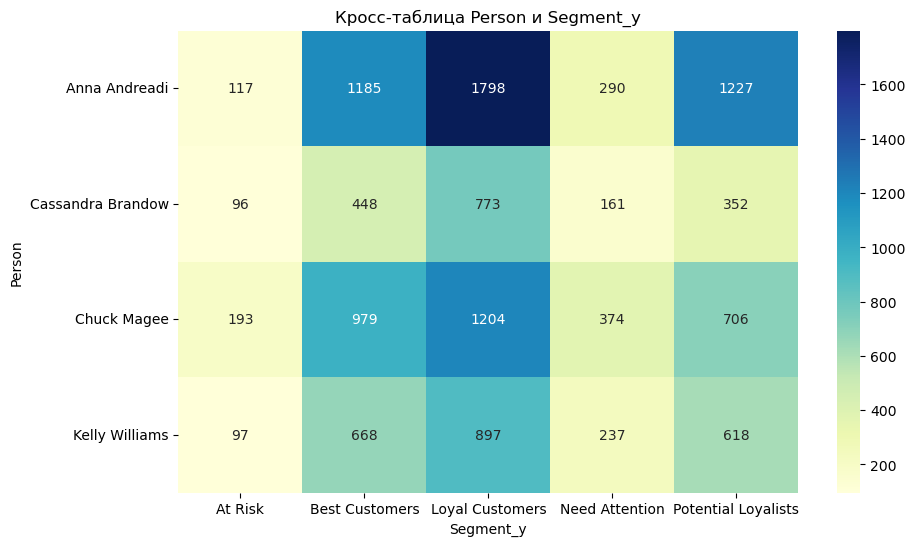

In [84]:
# Построение кросс-таблицы для Person и Segment_y
contingency_table = pd.crosstab(segment_data['Person'], segment_data['Segment_y'])

# Тест хи-квадрат
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Вывод результатов
print(f"Статистика хи-квадрат: {chi2}")
print(f"P-значение: {p_value}")

# Проверка гипотезы
alpha = 0.05
if p_value < alpha:
    print(f"Conclusion: p-value = {p_value:.5f} < {alpha}. Reject H0.")
    print("There is a statistically significant relationship between the service person and the customer segment.")
else:
    print(f"Conclusion: p-value = {p_value:.5f} >= {alpha}. Couldn't reject H0.")
    print("There is no statistically significant relationship between service person and customer segment.")
# Визуализация кросс-таблицы
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Кросс-таблица Person и Segment_y')
plt.ylabel('Person')
plt.xlabel('Segment_y')
plt.show()


## Hypothesis 5: Impact of customer type on RFM segmentation.
### Initiative: Personalized strategies and loyalty programs for different customer types

H0: There is no statistically significant relationship between the customer type (Segment_x: consumer, corporate, home office) and its RFM segment (Segment_y).

H1: There is a statistically significant relationship between the customer type (Segment_x: consumer, corporate, home office) and its RFM segment (Segment_y).

Статистика хи-квадрат: 161.98951074010748
P-значение: 6.135175287330653e-31
Conclusion: p-value = 0.00000 < 0.05. Reject H0.
There is a statistically significant relationship between customer type and the customer segment.


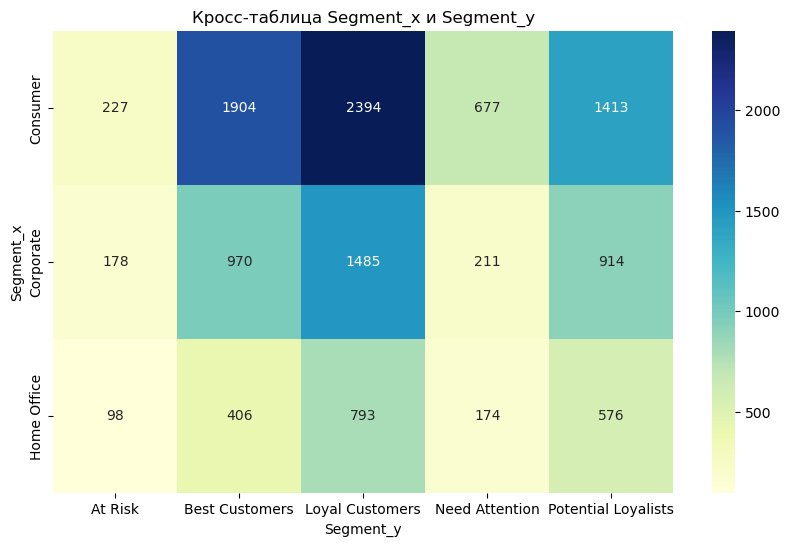

In [86]:
# Построение кросс-таблицы для Person и Segment_y
contingency_table = pd.crosstab(segment_data['Segment_x'], segment_data['Segment_y'])

# Тест хи-квадрат
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Вывод результатов
print(f"Статистика хи-квадрат: {chi2}")
print(f"P-значение: {p_value}")

# Проверка гипотезы
alpha = 0.05
if p_value < alpha:
    print(f"Conclusion: p-value = {p_value:.5f} < {alpha}. Reject H0.")
    print("There is a statistically significant relationship between customer type and the customer segment.")
else:
    print(f"Conclusion: p-value = {p_value:.5f} >= {alpha}. Couldn't reject H0.")
    print("There is no statistically significant relationship between customer type and the customer segment.")

# Визуализация кросс-таблицы
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Кросс-таблица Segment_x и Segment_y')
plt.ylabel('Segment_x')
plt.xlabel('Segment_y')
plt.show()
